In [1]:
#importing the libraries

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np 
import pandas as pd
import nltk

from tensorflow import keras
from keras.preprocessing.text import text_to_word_sequence
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud

In [2]:
import os
for dirname, _, filenames in os.walk('C:/Users/Hp/Desktop/AI_CANADA/SEM 2/AI Infrastructure and Architecture - AIDI 1006/Assignment 4'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:/Users/Hp/Desktop/AI_CANADA/SEM 2/AI Infrastructure and Architecture - AIDI 1006/Assignment 4\AI_INFRA_Assign4_base.ipynb
C:/Users/Hp/Desktop/AI_CANADA/SEM 2/AI Infrastructure and Architecture - AIDI 1006/Assignment 4\Assignment4.ipynb
C:/Users/Hp/Desktop/AI_CANADA/SEM 2/AI Infrastructure and Architecture - AIDI 1006/Assignment 4\neg_wc.csv
C:/Users/Hp/Desktop/AI_CANADA/SEM 2/AI Infrastructure and Architecture - AIDI 1006/Assignment 4\neutral_wc.csv
C:/Users/Hp/Desktop/AI_CANADA/SEM 2/AI Infrastructure and Architecture - AIDI 1006/Assignment 4\pos_wc.csv
C:/Users/Hp/Desktop/AI_CANADA/SEM 2/AI Infrastructure and Architecture - AIDI 1006/Assignment 4\sampleSubmission.csv
C:/Users/Hp/Desktop/AI_CANADA/SEM 2/AI Infrastructure and Architecture - AIDI 1006/Assignment 4\submission.csv
C:/Users/Hp/Desktop/AI_CANADA/SEM 2/AI Infrastructure and Architecture - AIDI 1006/Assignment 4\train.xlsx
C:/Users/Hp/Desktop/AI_CANADA/SEM 2/AI Infrastructure and Architecture - AIDI 1006/Assignment 4\try_ne

In [3]:
#reading the dataset
train_set = pd.read_csv("C:/Users/Hp/Desktop/AI_CANADA/SEM 2/AI Infrastructure and Architecture - AIDI 1006/Assignment 4/train.tsv/train.tsv",sep = '\t')
test_set= pd.read_csv("C:/Users/Hp/Desktop/AI_CANADA/SEM 2/AI Infrastructure and Architecture - AIDI 1006/Assignment 4/test.tsv/test.tsv",sep = '\t')



In [4]:
#veiwing top 5 records
train_set.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [5]:
#getting the count of training and test set
print("Count of training set", len(train_set))
print("Count of test set", len(test_set))

Count of training set 156060
Count of test set 66292


In [6]:
#descriptive info
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [7]:
#descriptive stats
train_set.describe()

,PhraseId,SentenceId,Sentiment
count,156060.000000,156060.000000,156060.000000
mean,78030.500000,4079.732744,2.063578
std,45050.785842,2502.764394,0.893832
min,1.000000,1.000000,0.000000
25%,39015.750000,1861.750000,2.000000
50%,78030.500000,4017.000000,2.000000
75%,117045.250000,6244.000000,3.000000
max,156060.000000,8544.000000,4.000000


In [8]:
#get the col names
train_set.columns

Index(['PhraseId', 'SentenceId', 'Phrase', 'Sentiment'], dtype='object')

In [9]:
#checking the unique values in target variable 'sentiment'
target_category = train_set['Sentiment'].unique()
target_category=list(map(str,target_category))
print(target_category)

['1', '2', '3', '4', '0']


In [10]:
train_set = train_set[['Phrase','Sentiment']]
train_set.head()

,Phrase,Sentiment
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2


In [11]:
#veiwing bottom 5 records
train_set.tail(5)

,Phrase,Sentiment
156055,Hearst 's,2
156056,forced avuncular chortles,1
156057,avuncular chortles,3
156058,avuncular,2
156059,chortles,2


<AxesSubplot:xlabel='Sentiment'>

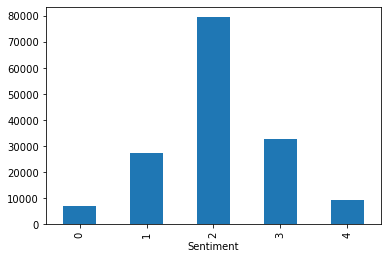

In [12]:
#target variable bar plot
train_set.groupby("Sentiment").Sentiment.count().plot.bar(ylim=0)

In [13]:
#Converting target variables to 3 values 

train_set.loc[(train_set['Sentiment'] == 0) | (train_set['Sentiment'] == 1) , 'Sentiment'] = 0
train_set.loc[train_set['Sentiment'] == 2 , 'Sentiment'] = 1
train_set.loc[(train_set['Sentiment'] == 3) | (train_set['Sentiment'] == 4) , 'Sentiment'] = 2


In [14]:
#veiw after conversion
train_set.head()

,Phrase,Sentiment
0,A series of escapades demonstrating the adage ...,0
1,A series of escapades demonstrating the adage ...,1
2,A series,1
3,A,1
4,series,1


<AxesSubplot:xlabel='Sentiment'>

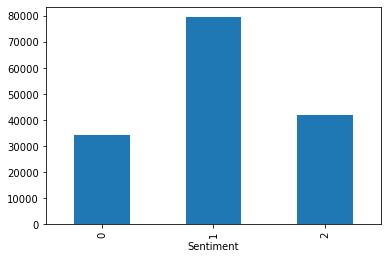

In [15]:
#bar plot with 3 values
train_set.groupby("Sentiment").Sentiment.count().plot.bar(ylim=0)

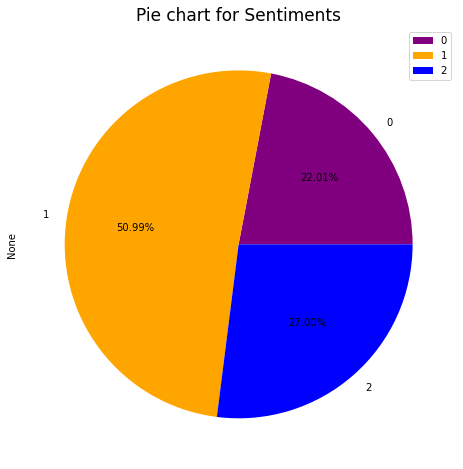

In [16]:
#pie chart visualization
category = train_set.groupby('Sentiment').size()

category.plot(kind='pie', subplots=True, figsize=(10, 8), autopct = "%.2f%%", colors=['purple','orange','blue','green','red'])
plt.title("Pie chart for Sentiments",fontsize=17)
plt.legend()
plt.show()

In [17]:
phrase = train_set['Phrase']
sentiment = train_set["Sentiment"]


In [18]:
#defining a pre-process function

def preprocessDataset(text): 
        
    text = str(text)
    
    #remove single quotes 
    text = text.replace("'", "")
    
    
    #word tokenization using text-to-word-sequence
    tokenized_train_set = text_to_word_sequence(text,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',split=" ")


    #stop word removal
    stop_words = set(stopwords.words('english'))
    stopwordremove = [i for i in tokenized_train_set if not i in stop_words]
    #print (stop_words)
     
    #join words into sentence
    stopwordremove_text = ' '.join(stopwordremove)
    #print(stopwordremove_text)
        
    #remove numbers
    numberremove_text = ''.join(c for c in stopwordremove_text if not c.isdigit())
    #print(output)
        
    #Stemming
    stemmer= PorterStemmer()
    
    stem_input=nltk.word_tokenize(numberremove_text)
    stem_text=' '.join([stemmer.stem(word) for word in stem_input])
    #print(stem_text)
    
    #lemmatization
    lemmatizer = WordNetLemmatizer()

    def get_wordnet_pos(word):
        """Map POS tag to first character lemmatize() accepts"""
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

        return tag_dict.get(tag, wordnet.NOUN)

    lem_input = nltk.word_tokenize(stem_text)
    lem_text= ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in lem_input])
    #print(lem_text)
    

    return lem_text

In [19]:
#applying pre-processing function on train data
train_set['Phrase'] = train_set['Phrase'].apply(preprocessDataset)
phrase = train_set['Phrase']
sentiment = train_set['Sentiment']
phrase.head()

0    seri escapad demonstr adag good goo also good ...
1                  seri escapad demonstr adag good goo
2                                                 seri
3                                                     
4                                                 seri
Name: Phrase, dtype: object

In [20]:
#defining a function to get the word cloud
def wordCollection(phrase, sentiment):
    words = []
    for i in phrase[phrase['Sentiment'] == sentiment]['Phrase'].str.split():
        for j in i:
            words.append(j)
    return words

In [21]:
##applying wordcloud function on train data
negative = wordCollection(train_set,0)
neutral = wordCollection(train_set,1)
positive = wordCollection(train_set,2)

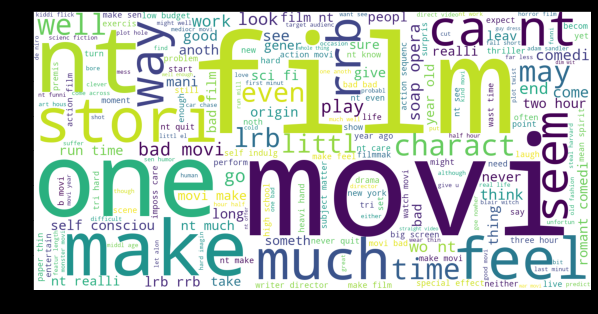

In [22]:
#most words used under negative cloud
wordCloud = WordCloud(background_color="white", width=1600, height=800).generate(' '.join(negative))
plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordCloud)

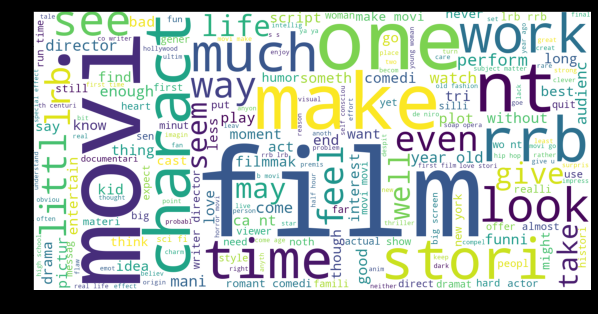

In [23]:
#most words used under neutral cloud
wordCloud = WordCloud(background_color="white", width=1600, height=800).generate(' '.join(neutral))
plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordCloud)

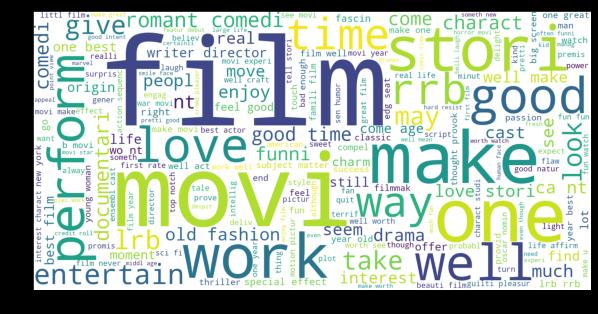

In [24]:
#most words used under positive cloud
wordCloud = WordCloud(background_color="white", width=1600, height=800).generate(' '.join(positive))
plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordCloud)

In [25]:
list_data = list(zip(phrase, sentiment))
train_set = pd.DataFrame(list_data,columns = ['Phrase', 'Sentiment'])
train_set.head(20)

,Phrase,Sentiment
0,seri escapad demonstr adag good goo also good ...,0
1,seri escapad demonstr adag good goo,1
2,seri,1
3,,1
4,seri,1
5,escapad demonstr adag good goo,1
6,,1
7,escapad demonstr adag good goo,1
8,escapad,1
9,demonstr adag good goo,1


In [26]:
#remove empty rows 
train_set['Phrase'].replace('', np.nan, inplace=True)
train_set.dropna(subset = ["Phrase"], inplace=True)
train_set.head(20)

,Phrase,Sentiment
0,seri escapad demonstr adag good goo also good ...,0
1,seri escapad demonstr adag good goo,1
2,seri,1
4,seri,1
5,escapad demonstr adag good goo,1
7,escapad demonstr adag good goo,1
8,escapad,1
9,demonstr adag good goo,1
10,demonstr adag,1
11,demonstr,1


In [27]:
#count after removing empty rows
print("Count after removing empty rows are: ",len(train_set))

Count after removing empty rows are:  154674


In [28]:
#final predictants and predictor labels for splitting
phrase = train_set['Phrase']
sentiment = train_set['Sentiment']
phrase.head()

0    seri escapad demonstr adag good goo also good ...
1                  seri escapad demonstr adag good goo
2                                                 seri
4                                                 seri
5                       escapad demonstr adag good goo
Name: Phrase, dtype: object

### Train_Test_Split

In [29]:
#split into 70:30
X_train, X_test, Y_train, Y_test = train_test_split(phrase,sentiment, test_size = 0.3, random_state = 60,shuffle=True, stratify=sentiment)

print(len(X_train))
print(len(X_test))

108271
46403


In [38]:
print(len(Y_test))

46403


In [30]:
#target variable unique values
target_category = train_set['Sentiment'].unique()
target_category=list(map(str,target_category))
print(target_category)

['0', '1', '2']


In [31]:
#decision tree classifier

dt = Pipeline([('tfidf', TfidfVectorizer()),
                ('dt', DecisionTreeClassifier()),
               ])

dt.fit(X_train, Y_train)

test_predict = dt.predict(X_test)

train_accuracy = round(dt.score(X_train,Y_train)*100)
test_accuracy =round(accuracy_score(test_predict, Y_test)*100)

print("Decision Tree Train Accuracy Score : {}% ".format(train_accuracy ))
print("Decision Tree Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, Y_test, target_names= target_category))

Decision Tree Train Accuracy Score : 90% 
Decision Tree Test Accuracy Score  : 71% 

              precision    recall  f1-score   support

           0       0.67      0.65      0.66     10744
           1       0.75      0.72      0.74     24241
           2       0.65      0.72      0.68     11418

    accuracy                           0.71     46403
   macro avg       0.69      0.70      0.69     46403
weighted avg       0.71      0.71      0.71     46403



In [32]:
#Test set
test_set.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [33]:
#prediction on test set
test_set['Phrase'] = test_set['Phrase'].apply(preprocessDataset)

test_id = test_set['PhraseId']
test_text = test_set['Phrase']
y_predict = dt.predict(test_text)

In [34]:
y_predict

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [37]:
# copying for visualization
neg_wc = pd.DataFrame(negative)
neg_wc.to_csv('neg_wc.csv', index=False)

neutral_wc = pd.DataFrame(neutral)
neutral_wc.to_csv('neutral_wc.csv', index=False)

pos_wc = pd.DataFrame(positive)
pos_wc.to_csv('pos_wc.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'neg_wc.csv'